# nema7 PDE=0.3, sigmaT = 85 ps, Hamamatsu (windows) Photoelectic

- Phantom : nema 7
- Detector geometry: SiPMs in LXe, with quartz windows 
- Time resolution: 85 ps
- PDE = 0.3

In [1]:
import Pkg

In [3]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [6]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [7]:
Pkg.add("Distributions") 

In [1]:
#using Distributions

In [2]:
#using LsqFit
#using GLM
#using HTTP
#using Test

In [1]:
using Plots
using DataFrames
using HDF5
using DrWatson
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [2]:
using Glob
using CSV

In [3]:
using Statistics
using StatsBase
using Printf

In [4]:
using Logging

In [5]:
@quickactivate "JPetalo"

In [6]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [7]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [8]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [66]:
include(srcdir("JPetalo.jl"))

Main.JPetalo

In [10]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [11]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

In [12]:
function ploth2d(df1, c1, c2, tx1, ty1, xmin1, xmax1, xmin2, xmax2, bins=150)
    h1,p1 = JPetalo.hist2d(df1[!,c1],df1[!,c2], bins, tx1, ty1, xmin1, xmax1, xmin2, xmax2)
    plot(p1, layout= (1, 1), legend=false, fmt = :png,
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

ploth2d (generic function with 2 methods)

# Characterization 

In [13]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(45) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

### Read Nema7 Phot DF

In [14]:
n7df = JPetalo.readdf("n7df-phot");  

In [15]:
nrow(n7df)

1030775

In [16]:
println(names(n7df))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


## q1 vs q2

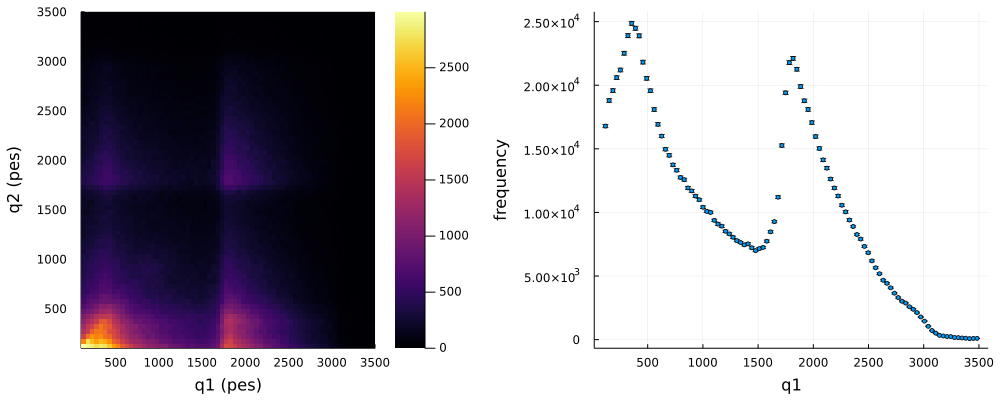

In [17]:
h1,p1 = JPetalo.hist2d(n7df.q1, n7df.q2, 150, "q1 (pes)","q2 (pes)", 100., 3500.,100., 3500.)
h2,p2       = JPetalo.hist1d(n7df.q1, "q1", 100, 100.0, 3500.);
plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
    left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


## Cut in (q1,q2) in the inverval (1500, 3000)

In [18]:
n7dfq =JPetalo.selectinterval(n7df, "q1", "q2", 1500.0, 3000.0);

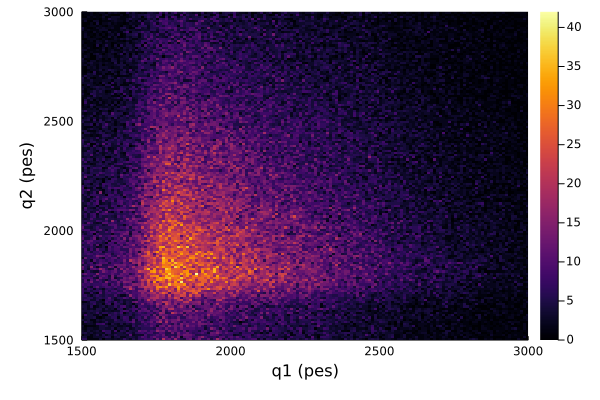

In [19]:
JPetalo.ploth2d(n7dfq, "q1","q2","q1 (pes)","q2 (pes)",100., 3500.,100., 3500.)

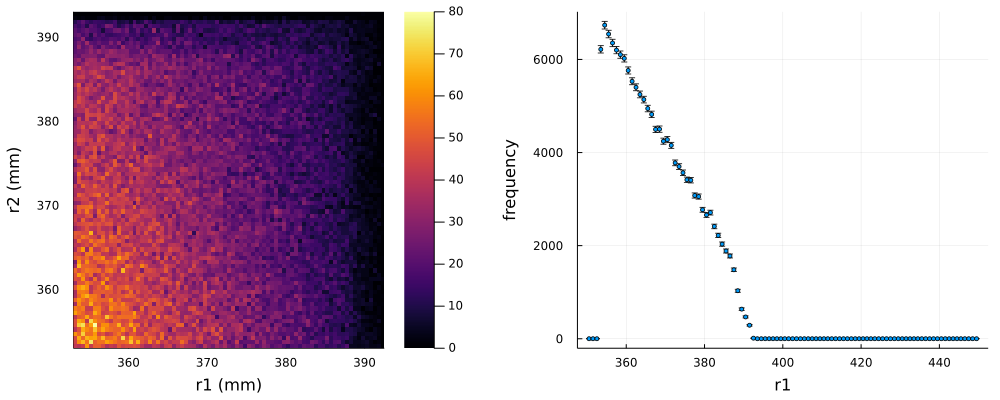

In [20]:
h1,p1 = JPetalo.hist2d(n7dfq.r1, n7dfq.r2, 150, "r1 (mm)","r2 (mm)",350., 450.,350., 450.)
h2,p2 = JPetalo.hist1d(n7dfq.r1, "r1", 100, 350., 450.)
plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
    left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


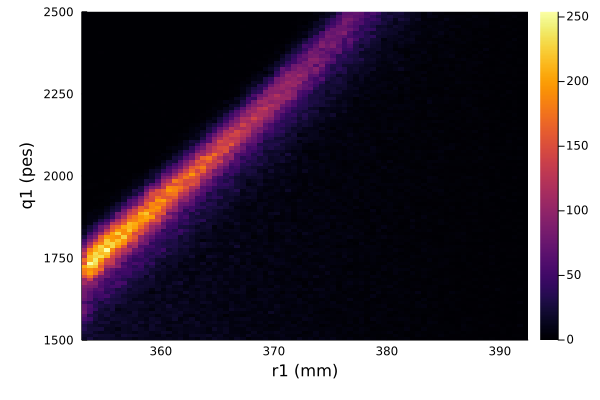

In [21]:
JPetalo.ploth2d(n7dfq, "r1","q1","r1 (mm)","q1 (pes)",350., 450.,1500.0, 2500.0)

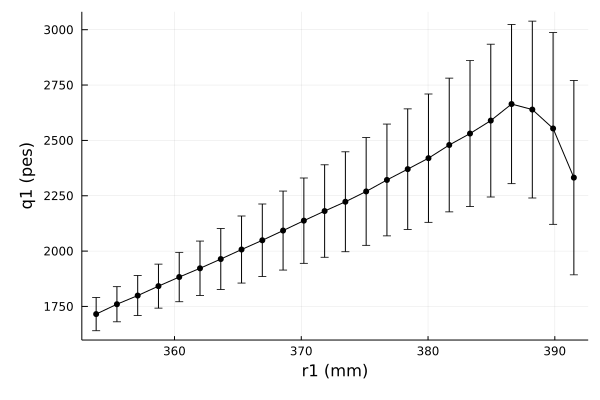

In [22]:
JPetalo.profile(n7dfq, "r1","q1","r1 (mm)","q1 (pes)")

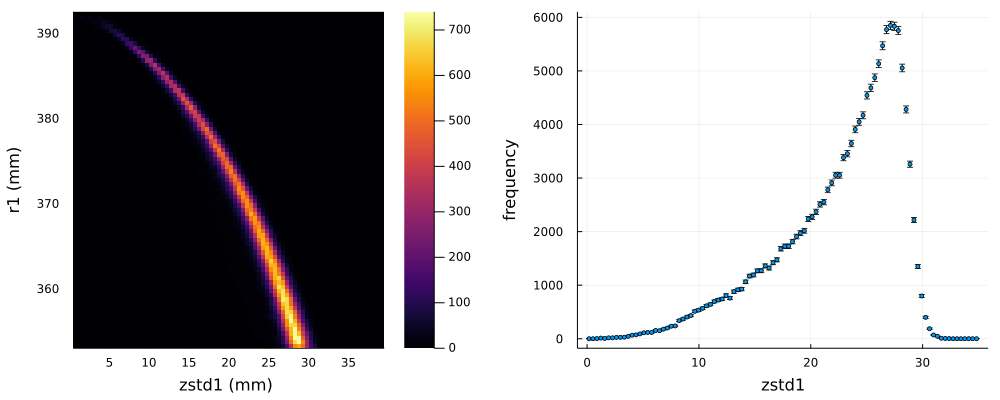

In [23]:
h1,p1 = JPetalo.hist2d(n7dfq.zstd1, n7dfq.r1, 150, "zstd1 (mm) ","r1 (mm)",0.0, 40.0,350., 450.)
h2,p2 = JPetalo.hist1d(n7dfq.zstd1, "zstd1", 100, 0.,35.)
plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
    left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


In [24]:
n7dfz =JPetalo.selectinterval(n7dfq, "zstd1", "zstd2", 3.0, 30.0);

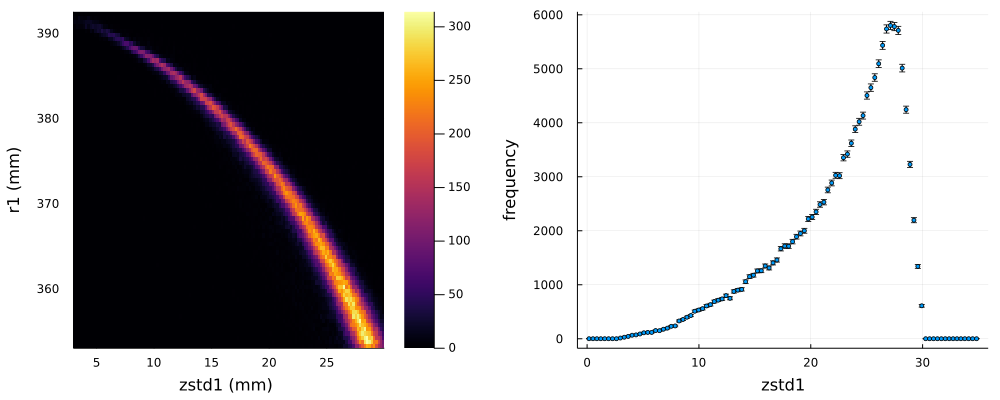

In [25]:
h1,p1 = JPetalo.hist2d(n7dfz.zstd1, n7dfz.r1, 150, "zstd1 (mm) ","r1 (mm)",0.0, 40.0,350., 450.)
h2,p2 = JPetalo.hist1d(n7dfz.zstd1, "zstd1", 100, 0.,35.)
plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
    left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


for n7dfz: fit parameters[392.26976278287475, -0.15084618431309726, -0.03975197488440605]


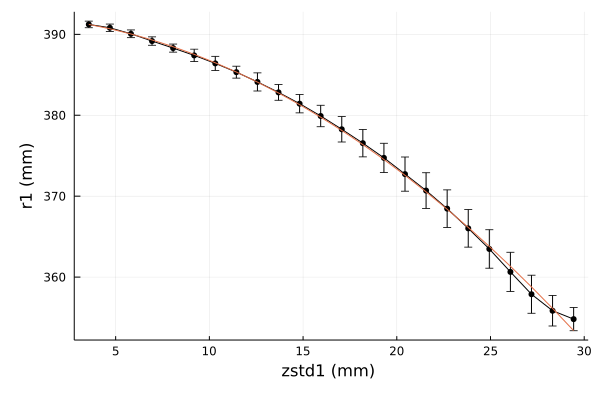

In [26]:
cz, fz, pz = JPetalo.fit_profile(n7dfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)", "pol2")
println("for n7dfz: fit parameters", cz)
 
plot(pz,  layout= (1, 1), legend=false, fmt = :png,  
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


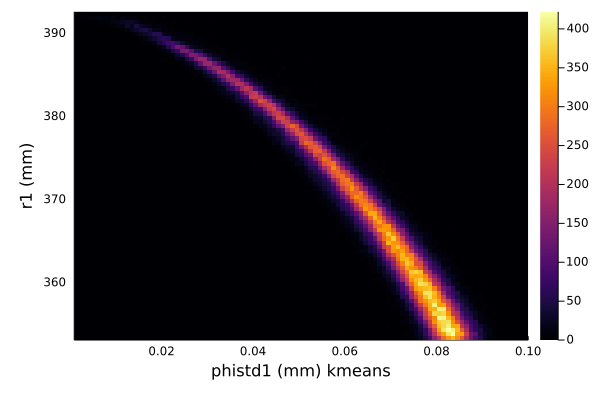

In [27]:
JPetalo.ploth2d(n7dfq, "phistd1","r1","phistd1 (mm) kmeans","r1 (mm)",0.0, 0.1, 350., 450.)

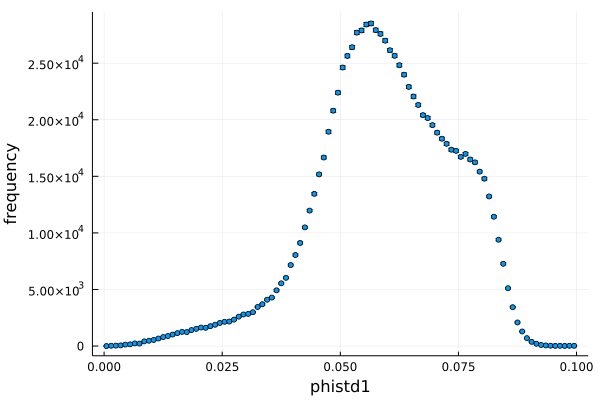

In [28]:
h,p       = JPetalo.hist1d(n7df.phistd1, "phistd1", 100, 0.,0.1)
plot(p)

In [29]:
n7dfp =JPetalo.selectinterval(n7dfz, "phistd1", "phistd2", 0.02, 0.085);

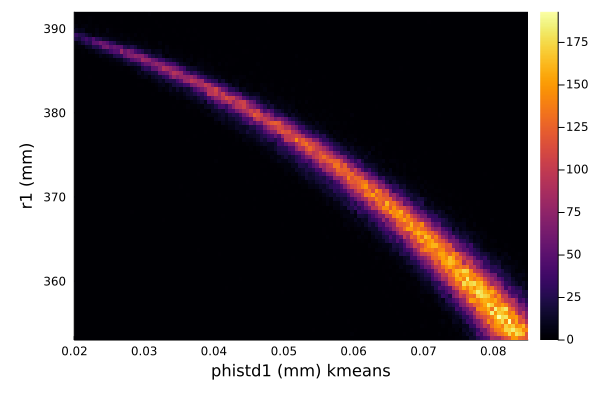

In [30]:
JPetalo.ploth2d(n7dfp, "phistd1","r1","phistd1 (mm) kmeans","r1 (mm)",0.0, 0.1, 350., 450.)

for n7dfp: fit parameters[392.3022445144583, -63.01317694127801, -4652.477855570365]


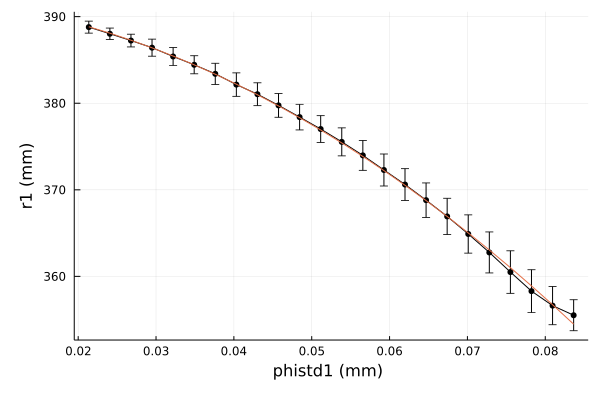

In [31]:
cp, fp, pp = JPetalo.fit_profile(n7dfp, "phistd1","r1","phistd1 (mm) ","r1 (mm)", "pol2")
println("for n7dfp: fit parameters", cp)
 
plot(pp,  layout= (1, 1), legend=false, fmt = :png,  
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


### ZSTD resolution

In [32]:
r1z = fz.(n7dfp.zstd1);
r1p = fp.(n7dfp.phistd1);

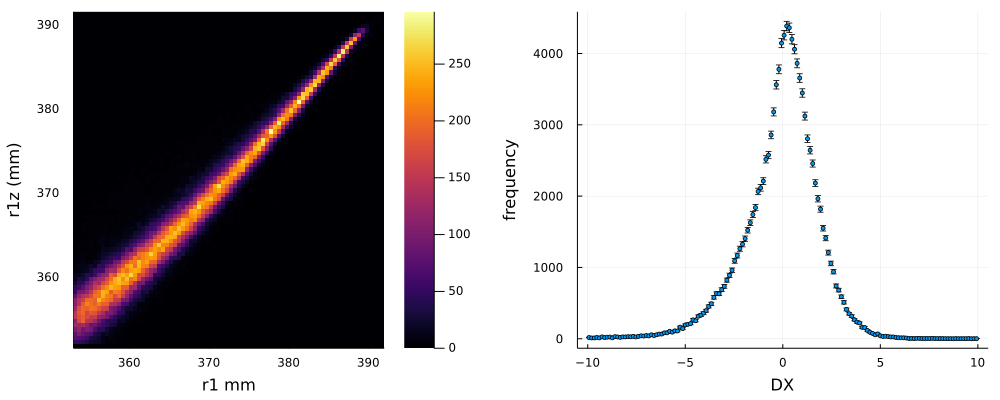

In [33]:
JPetalo.plotreso(n7dfp, r1z, "r1 mm", "r1z (mm)", -10., 10.)

sigma1 =   1.839 sigma2 =   0.688

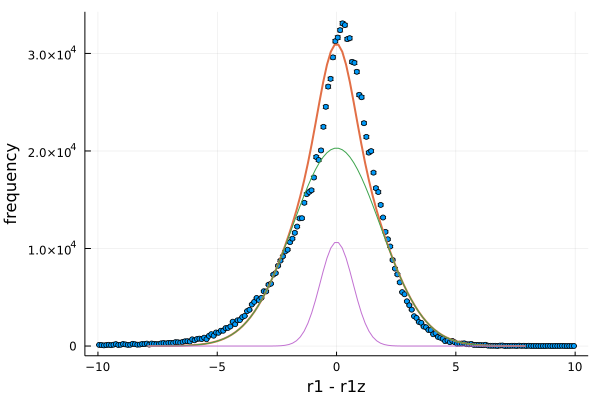

In [37]:
fg, p = JPetalo.fitg2(n7dfp.r1 - r1z, "r1 - r1z", 200, -10.0, 10.0, 
                      xg1min=-8.0, xg1max=-2.5, 
                      xg2min=-2.5, xg2max =2.5, 
                      xgmin =-8.0, xgmax  =8.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

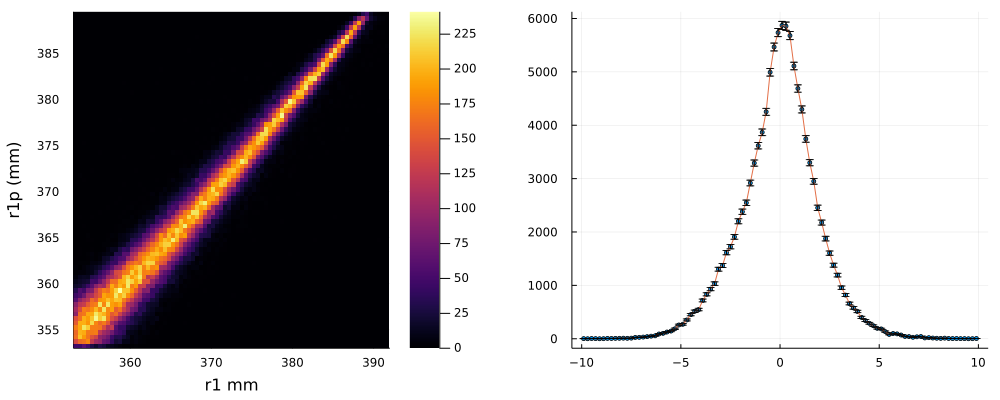

In [57]:
JPetalo.plotreso(n7dfp, r1p, "r1 mm", "r1p (mm)", -10., 10.)

sigma1 =   2.068 sigma2 =   0.779

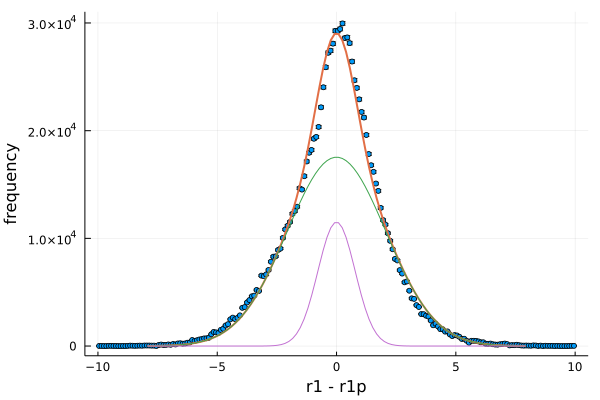

In [38]:
fg, p = JPetalo.fitg2(n7dfp.r1 - r1p, "r1 - r1p", 200, -10.0, 10.0, 
                      xg1min=-8.0, xg1max=-2.5, 
                      xg2min=-2.5, xg2max =2.5, 
                      xgmin =-8.0, xgmax  =8.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

## Resolution in (x,y,z,r) intrinsic

In [39]:
limxy = 5.0;

In [40]:
hxtxr, pxtxr = JPetalo.hist1d(n7dfp.xt1 - n7dfp.x1, "xt - xr", 50,  -limxy, limxy);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [41]:
hytyr, pytyr = JPetalo.hist1d(n7dfp.yt1 - n7dfp.y1, "yt - yr", 50,  -limxy, limxy);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [42]:
hztzr, pztzr = JPetalo.hist1d(n7dfp.zt1 - n7dfp.z1, "zt - zr", 50,  -limxy, limxy);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

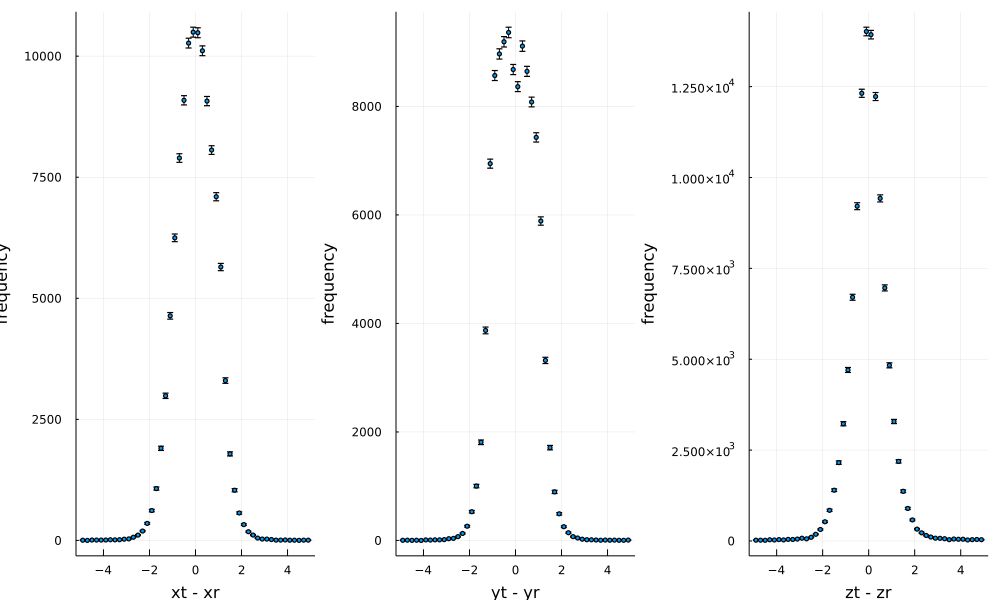

In [43]:
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

In [48]:
fg,p = JPetalo.fitg1(n7dfp.zt1 - n7dfp.z1, "dz", 200, -5., 5., 
                     xgmin=-3.5, xgmax=3.5, fbins=100)
plot(p)
@printf "sigma (1g) = %7.3f " fg.std[1]

sigma (1g) =   0.632 

## TOF

In [49]:
dfu = JPetalo.setunits(n7dfp);

In [50]:
dt12 = JPetalo.deltatime(dfu, JPetalo.dtfirst);

In [51]:
t12 = dt12./ps;

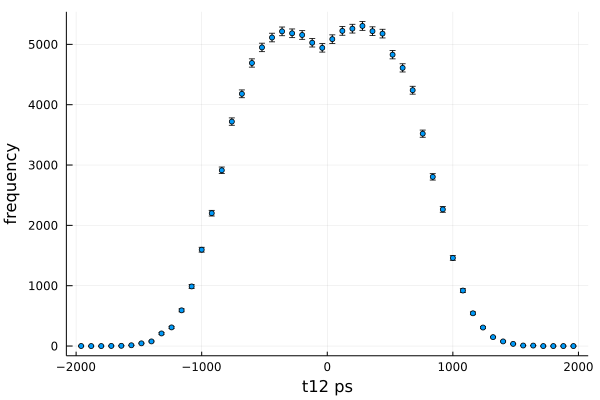

In [52]:
h,p       = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(p)

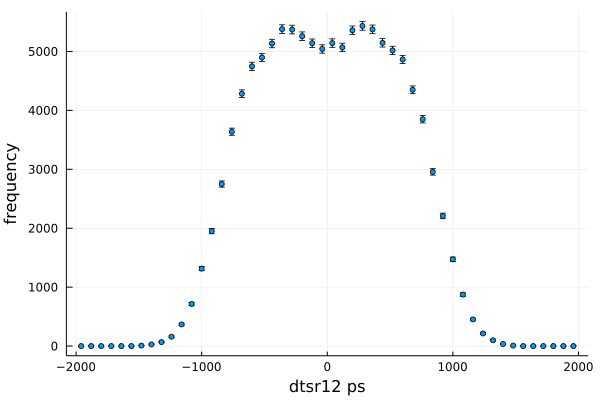

In [53]:
dtsr12 = JPetalo.ctsr(dfu, JPetalo.postrue)
tsr12 = dtsr12./ps
h,p       = JPetalo.hist1d(tsr12, "dtsr12 ps", 50,  -2000., 2000.)
plot(p)

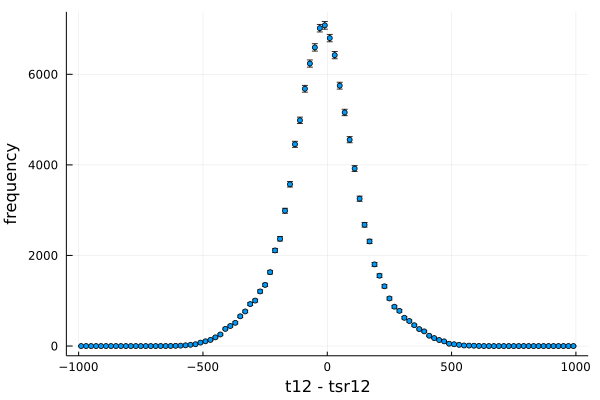

In [54]:
h,p       = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 100,  -1000., 1000.)
plot(p)

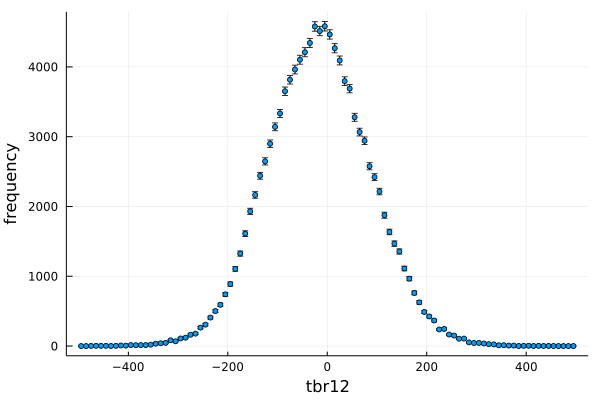

In [55]:
dtrb12 = JPetalo.cdoi(dfu, JPetalo.postrue);
trb12 = dtrb12 ./ps
h,p       = JPetalo.hist1d(trb12, "tbr12", 100,  -500., 500.)
plot(p)

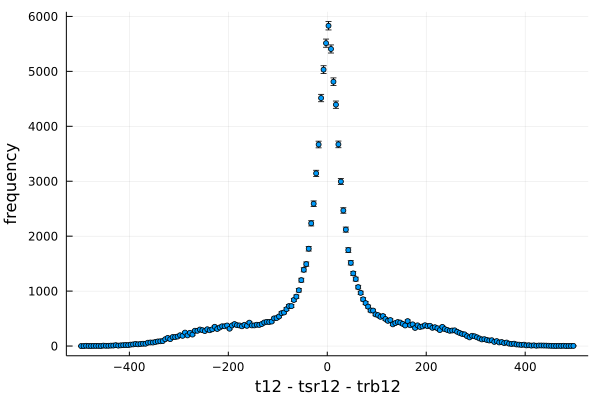

In [56]:
h,p       = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 200,  -500., 500.)
plot(p)

In [61]:
dt = t12 - tsr12 - trb12;

sigma1 = 163.044 sigma2 =  22.807

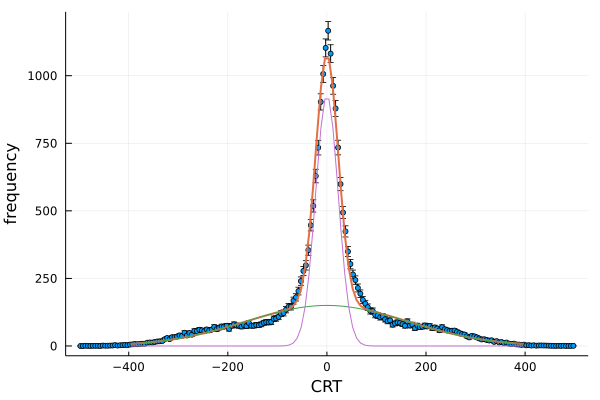

In [63]:
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

First photon, position true: FWHM1 = 375.002 FWHM2 =  52.456

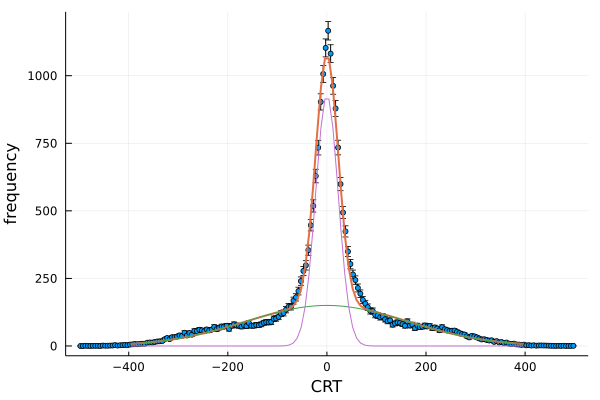

In [69]:
dt = JPetalo.crt(dfu, JPetalo.dtfirst,JPetalo.postrue)
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

fastest photoelectron, position true: FWHM1 = 407.424 FWHM2 = 209.850

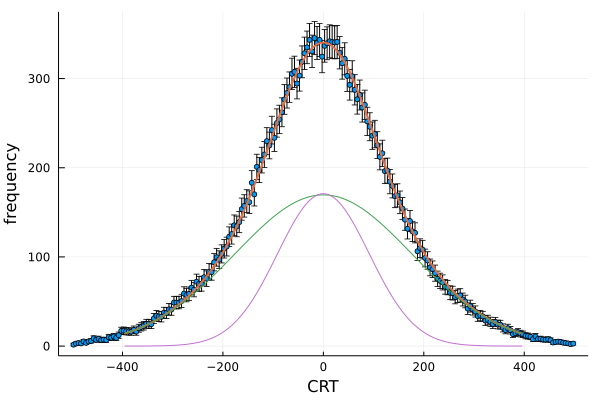

In [70]:
dt = JPetalo.crt(dfu, JPetalo.dtminimum,JPetalo.postrue)
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "fastest photoelectron, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

fastest photoelectron, position true: FWHM = 310.002

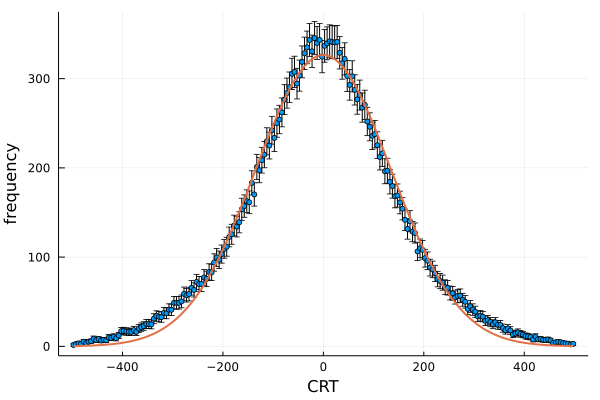

In [71]:
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position true: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

fastest photoelectron, position reco: FWHM = 309.772

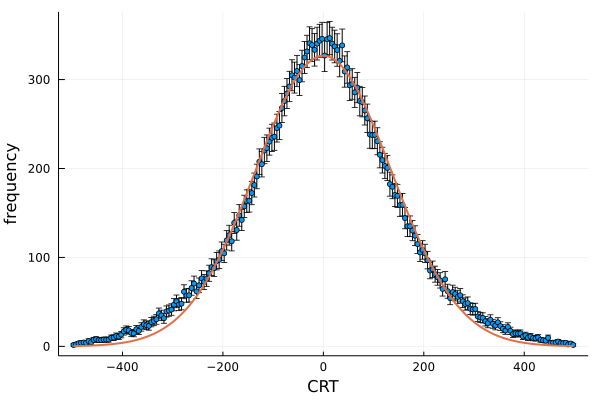

In [72]:
dt = JPetalo.crt(dfu, JPetalo.dtminimum,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 311.790

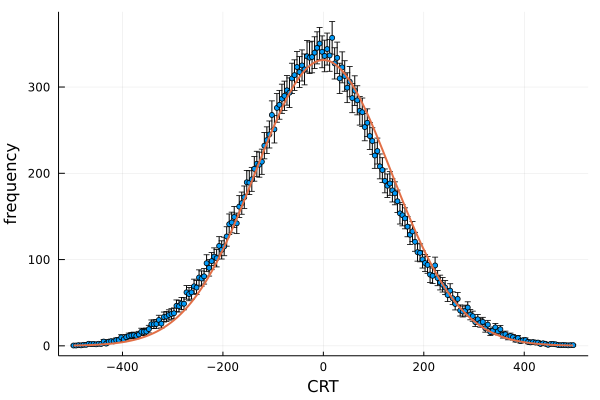

In [73]:
dt = JPetalo.crt(dfu, JPetalo.dtaverage,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)